# Normalized Opus -- Functional Level Comparision

This notebook computes the significance of the normalized opus score for the following:
1. Electric Hook Type TD
    * vs. all types of Electric Hand
    * vs. Electric single grip hand
    * vs. body-powered TD
    * vs. Electric multi-articulating hand
2. Motion Control ETD
    * vs. electric hooks
3. Multi-articulating hands    
    * vs. Electric single grip hand
    * vs. Body-powered TD
4. Check T-test
    * Anova
    * Tukey Tests

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from driverCleanData import cleanData
%matplotlib inline
[sht,_] = cleanData();

Let's look at the summary stats for all data on the normalized opus

In [32]:
sht.normalizedOpus.dropna().describe()

count    1221.000000
mean        3.179006
std         0.416217
min         2.166667
25%         2.833333
50%         3.111111
75%         3.437500
max         4.000000
Name: normalizedOpus, dtype: float64

Since the opus is normalized, this means that only the activities the respondents use the prosthesis on are counted.  Thus the maximum score possible is 4 and the lowest is 0.  Here we see a mean of 3.17 and a standard deviation of 0.41, which may be interpreted as: The tasks which the respondents use their prosthesis for, they typically find the task slightly difficult.

## Electric Hook TD
### vs. all types of Electric Hand



In [2]:
from vectorSubsets import electricHooks, electricHandMA, electricHandSG
print("Electric hooks are: {0}".format(electricHooks))
print()
print("Electric hands - multi articulating are {0}".format(electricHandMA))
print()
print("Electric hands - single grip are {0}".format(electricHandSG))

Electric hooks are: ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']

Electric hands - multi articulating are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

Electric hands - single grip are ['Motion Control (MC) Hand', 'Otto Bock Hand']


In [3]:
sht["opusEHo"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(electricHooks)]
sht["opusAllEHa"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(electricHandMA or electricHandSG)].dropna()

#### Summary Stats

First up the electric hooks

In [4]:
sht.opusEHo.dropna().describe()

count    117.000000
mean       3.058773
std        0.372775
min        2.363636
25%        2.777778
50%        3.000000
75%        3.250000
max        4.000000
Name: opusEHo, dtype: float64

Now for the electric hands

In [5]:
sht.opusAllEHa.dropna().describe()

count    280.000000
mean       3.211556
std        0.378506
min        2.166667
25%        2.900000
50%        3.242647
75%        3.437500
max        4.000000
Name: opusAllEHa, dtype: float64


#### Histogram


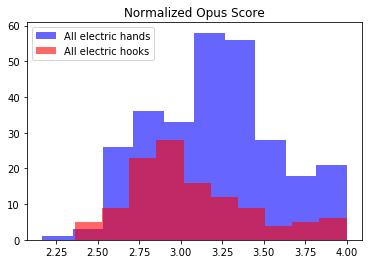

In [36]:
plt.hist(sht.opusAllEHa.dropna(), alpha=0.6, color='b', label = "All electric hands")
plt.hist(sht.opusEHo.dropna(), alpha=0.6, color='r', label = "All electric hooks")
plt.title("Normalized Opus Score")
plt.legend()
plt.show()

In [7]:
stats.ttest_ind(sht.opusAllEHa.dropna(), sht.opusEHo.dropna())

Ttest_indResult(statistic=3.6830158986463086, pvalue=0.00026258021363330305)

The higher mean score on Normalized Opus of electric hands compared to electric hooks is significant.

## vs. Electric single grip hand

In [8]:
sht["opusElecSG"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(electricHandSG)]
print("The types of devices we are considering as electric hands are {0}".format(electricHandSG))
print()
print("The mean of the electric hooks opus is {0}".format(sht.opusEHo.dropna().mean()))
print()
print("The summary stats for the single grip are")
print(sht.opusElecSG.dropna().describe())

The types of devices we are considering as electric hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The mean of the electric hooks opus is 3.058772974443373

The summary stats for the single grip are
count    607.000000
mean       3.214464
std        0.437060
min        2.333333
25%        2.888889
50%        3.100000
75%        3.535885
max        4.000000
Name: opusElecSG, dtype: float64


In [9]:
stats.ttest_ind(sht.opusEHo.dropna(), sht.opusElecSG.dropna())

Ttest_indResult(statistic=-3.6079645954487964, pvalue=0.0003298957487412504)

The higher mean score for single grip hands is signficant.

#### Histograms


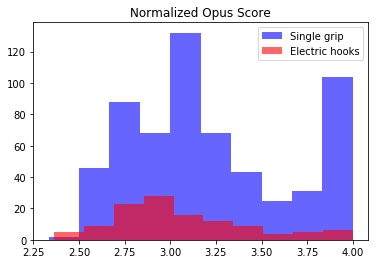

In [35]:
plt.hist(sht.opusElecSG.dropna(), color='b', alpha=0.6, label = "Single grip")
plt.hist(sht.opusEHo.dropna(), color='r', alpha=0.6, label = "Electric hooks")
plt.title("Normalized Opus Score")
plt.legend()
plt.show()

## vs. Body Powered Hooks

In [11]:
from vectorSubsets import bodyPoweredHooks
sht["opusBPHook"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(bodyPoweredHooks)]
sht.opusBPHook.dropna().describe()

count    185.000000
mean       3.064431
std        0.401842
min        2.375000
25%        2.750000
50%        2.900000
75%        3.350000
max        4.000000
Name: opusBPHook, dtype: float64

In [12]:
stats.ttest_ind(sht.opusEHo.dropna(), sht.opusBPHook.dropna())

Ttest_indResult(statistic=-0.12256137888705929, pvalue=0.90253650099781646)

Can't reject the null at alpha=0.05, so there might not be a significant difference between body powered and electric hooks on the normalized opus score

## vs. Multi-articulating Hands

In [13]:
from vectorSubsets import electricHandMA
sht["opusMA"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(electricHandMA)]
print("The summary stats for multi-articulating are:")
print(sht.opusMA.dropna().describe())

The summary stats for multi-articulating are:
count    280.000000
mean       3.211556
std        0.378506
min        2.166667
25%        2.900000
50%        3.242647
75%        3.437500
max        4.000000
Name: opusMA, dtype: float64


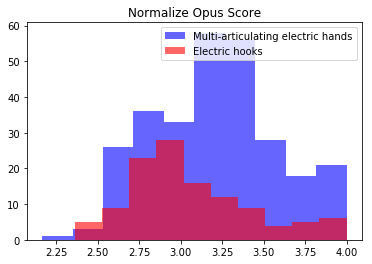

In [37]:
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating electric hands")
plt.hist(sht.opusEHo.dropna(), alpha=0.6, color='r', label = "Electric hooks")
plt.title("Normalize Opus Score")
plt.legend()
plt.show()

In [15]:
stats.ttest_ind(sht.opusEHo.dropna(),sht.opusMA.dropna())

Ttest_indResult(statistic=-3.6830158986463086, pvalue=0.00026258021363330305)

The higher mean score of the multi-articulating is significant compared to electric hooks.

# Motion Control ETD vs. All Electric Hooks

In [16]:
sht["opusETD"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"]=="Motion Control (MC) ETD"]
from vectorSubsets import electricHooksNoETD
sht["opusElecNoETD"] = sht.normalizedOpus[sht["PrimaryTerminalDevice"].isin(electricHooksNoETD)]
print("The electric hooks we are considering are: {0}".format(electricHooksNoETD))
print("The number of participants are {0}".format(sht.opusElecNoETD.dropna().count()))
print()
print("The average score on opus for the ETD is {0}".format(sht.opusETD.dropna().mean()))
print("The average score on opus for the electric hooks is {0}".format(sht.opusElecNoETD.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusETD.dropna(), sht.opusElecNoETD.dropna()))

The electric hooks we are considering are: ['Otto Bock Greifer', 'Otto Bock Axon Hook']
The number of participants are 28

The average score on opus for the ETD is 2.9885097542192205
The average score on opus for the electric hooks is 3.282109638727286

Ttest_indResult(statistic=-3.8447600819128045, pvalue=0.00019834505869393984)


This result is significant and unfortunately unfavorable for the ETD.  However when we look at the histogram we do not see that the non etd hooks distribution is normal so that assumption falls away and we can neither accept nor reject the null hypothesis.

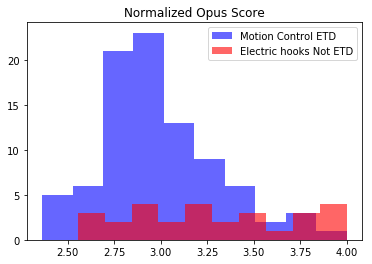

In [39]:
plt.hist(sht.opusETD.dropna(), alpha=0.6, color='b', label = "Motion Control ETD")
plt.hist(sht.opusElecNoETD.dropna(), alpha=0.6, color='r', label = "Electric hooks Not ETD")
plt.title("Normalized Opus Score")
plt.legend()
plt.show()

## Multi-articulating hands
### vs. Single Grip hands

In [18]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the single grip group are {0}".format(electricHandSG))
print()
print("The average score on opus for the multi-articulating is {0}".format(sht.opusMA.dropna().mean()))
print("The average score on opus for the single grip is {0}".format(sht.opusElecSG.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMA.dropna(), sht.opusElecSG.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the single grip group are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The average score on opus for the multi-articulating is 3.211555785883242
The average score on opus for the single grip is 3.214463690408739

Ttest_indResult(statistic=-0.095956965997671603, pvalue=0.9235764745847912)


The higher score on the single grip hands is not significant.

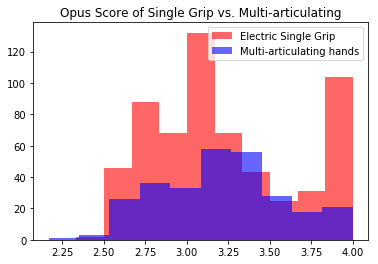

In [19]:
plt.hist(sht.opusElecSG.dropna(), alpha=0.6, color='r', label = "Electric Single Grip")
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.title("Opus Score of Single Grip vs. Multi-articulating")
plt.legend()
plt.show()

### vs. Body Powered

In [20]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the body powered group are {0}".format(bodyPoweredHooks))
print()
print("The average score on opus for the multi-articulating is {0}".format(sht.opusMA.dropna().mean()))
print("The average score on opus for body powered is {0}".format(sht.opusBPHook.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMA.dropna(), sht.opusBPHook.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the body powered group are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The average score on opus for the multi-articulating is 3.211555785883242
The average score on opus for body powered is 3.0644314336729175

Ttest_indResult(statistic=4.0026683585178757, pvalue=7.2923558005955942e-05)


The higher score on the normalized opus by the multi-articulating hands is significant.

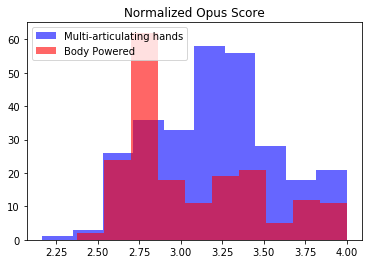

In [40]:
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.hist(sht.opusBPHook.dropna(), alpha=0.6, color='r', label = "Body Powered")
plt.title("Normalized Opus Score")
plt.legend()
plt.show()

# Check t-test analysis
The results from t-tests can sometimes lead to too many false positives, anova and Tukey's test accomadate for multiple comparisons.  So the below should be a validation of what was observed above.

To recall the T-tests for the following were significant (with the grouping with the higher mean score coming first)
* Electric Hand vs. Electric Hooks
* Single Grip vs. Electric Hooks
* Multi-articulating vs. Electric Hooks
* Multi-articulating vs. Body-powered

## ANOVA
Use anova to make sure there is a difference in the means of at least one of the opus scores between the body powered, multi-articulating, single grip, and electric hooks

In [22]:
print("The body powered hooks are {0}".format(bodyPoweredHooks))
print()
print("The multi-articulating hands are {0}".format(electricHandMA))
print()
print("The single grip hands are {0}".format(electricHandSG))
print()
print("The electric hooks are {0}".format(electricHooks))

The body powered hooks are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The multi-articulating hands are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The single grip hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The electric hooks are ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']


Now we'll run anova to check that there is a difference among the mean scores on opus of these 4 groups.

In [23]:
stats.f_oneway(sht.opusBPHook.dropna(), sht.opusMA.dropna(), sht.opusElecSG.dropna(), sht.opusEHo.dropna())

F_onewayResult(statistic=10.115388615804502, pvalue=1.3957021019213132e-06)

We definetely have have signficance at 0.05.

## Tukey

The below will display a graph and a table the table will tell us the mean difference, confidence intervals and if we can reject the null hypothesis at a 95% confidence level

In [24]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedOpus']], axis=1, keys=['deviceCategory','normalizedOpus'])
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([bodyPoweredHooks],"Body Powered")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHandMA], "Multi-articulating")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHandSG], "Single Grip")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHooks], "Electric Hooks")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Otto.*', "Electric Hooks", regex=True)
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Other.*', np.nan, regex=True)
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Pass.*', np.nan, regex=True)
#groups = opusDf.groupby(opusDf['deviceCategory']).groups
#opusDf['deviceCategory'] = str(opusDf['deviceCategory'])
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)

group1,group2,meandiff,lower,upper,reject
Body Powered,Electric Hooks,0.0302,-0.0913,0.1517,False
Body Powered,Multi-articulating,0.1471,0.0463,0.2479,True
Body Powered,Single Grip,0.15,0.0607,0.2394,True
Electric Hooks,Multi-articulating,0.1169,0.0043,0.2295,True
Electric Hooks,Single Grip,0.1198,0.0173,0.2223,True
Multi-articulating,Single Grip,0.0029,-0.074,0.0798,False


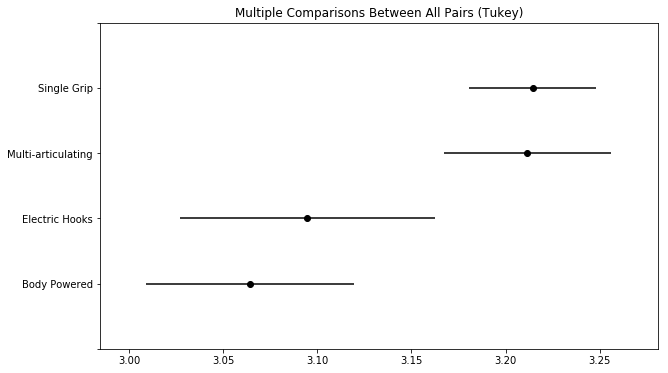

In [25]:
from ipykernel import kernelapp as app
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()           

At a significance level of 0.05 we are beginning to see that the hands are outperforming electric hooks and body powered hooks on the normalized opus.  This confirms what we saw in the T-tests.

## Significance among brands
I'm curious if we'll get something  by looking at the specific brands

group1,group2,meandiff,lower,upper,reject
Body-powered Hand,Hosmer Hook,0.4603,0.2396,0.6809,True
Body-powered Hand,Michelangelo Hand,0.3782,0.2122,0.5442,True
Body-powered Hand,Motion Control (MC) ETD,0.0403,-0.1375,0.2181,False
Body-powered Hand,Motion Control (MC) Hand,0.2509,0.1236,0.3782,True
Body-powered Hand,Other (please specify),0.4364,-0.4925,1.3654,False
Body-powered Hand,Otto Bock Axon Hook,0.3339,0.0633,0.6046,True
Body-powered Hand,Otto Bock Hand,0.3144,0.1592,0.4695,True
Body-powered Hand,Otto BockGreifer,0.4464,0.0804,0.8125,True
Body-powered Hand,Passive Hand,0.3056,-0.0391,0.6503,False
Body-powered Hand,TRS Hook,-0.0628,-0.9917,0.8662,False


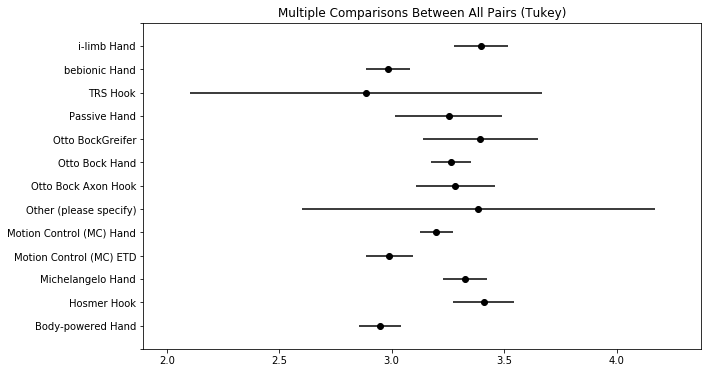

In [26]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedOpus']], axis=1, keys=['deviceCategory','normalizedOpus'])
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary() 

The TRS Hook and "other" are mucking up the scale, let's remove those

group1,group2,meandiff,lower,upper,reject
Body-powered Hand,Hosmer Hook,0.4603,0.2459,0.6747,True
Body-powered Hand,Michelangelo Hand,0.3782,0.2169,0.5394,True
Body-powered Hand,Motion Control (MC) ETD,0.0403,-0.1324,0.2131,False
Body-powered Hand,Motion Control (MC) Hand,0.2509,0.1273,0.3746,True
Body-powered Hand,Otto Bock Axon Hook,0.3339,0.071,0.5969,True
Body-powered Hand,Otto Bock Hand,0.3144,0.1636,0.4651,True
Body-powered Hand,Otto BockGreifer,0.4464,0.0908,0.802,True
Body-powered Hand,Passive Hand,0.3056,-0.0292,0.6405,False
Body-powered Hand,bebionic Hand,0.0343,-0.1299,0.1985,False
Body-powered Hand,i-limb Hand,0.4488,0.2536,0.6441,True


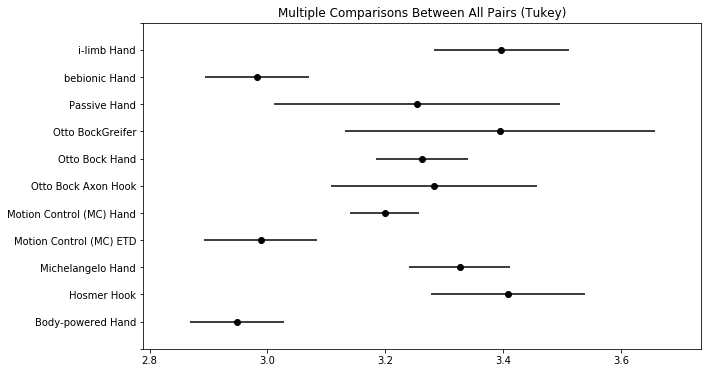

In [27]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedOpus']], axis=1, keys=['primaryTD','normalizedOpus'])
opusDf["primaryTD"] = opusDf["primaryTD"].replace('Other.*', np.nan, regex=True)
opusDf["primaryTD"] = opusDf["primaryTD"].replace('TRS.*', np.nan, regex=True)
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary() 

The brands with wide confidence intervals don't have many respondents.  The brands with narrow confidence intervals have many respondents.  This graph helps us see where everything lands.